<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EI-baseline-evaluation" data-toc-modified-id="EI-baseline-evaluation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EI baseline evaluation</a></span></li></ul></div>

# EI baseline evaluation

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [3]:
ei = pd.read_csv('Data Raja/Raja1.csv', delimiter=';')
ei_r1 = pd.read_csv('Data Raja/Raja1.csv', delimiter=';')
ei_r2 = pd.read_csv('Data Raja/Raja2.csv', delimiter=';')
ei_r3 = pd.read_csv('Data Raja/Raja3.csv', delimiter=';')
ei_r4 = pd.read_csv('Data Raja/Raja4.csv', delimiter=';')
ei_r5 = pd.read_csv('Data Raja/Raja5.csv', delimiter=';')

In [74]:
ei = pd.read_csv('NISE/Data Raja/Raja1.csv', delimiter=';')
ei_r1 = pd.read_csv('NISE/Data Raja/Malek1.csv', delimiter=';')
ei_r2 = pd.read_csv('NISE/Data Raja/Malek2.csv', delimiter=';')
ei_r3 = pd.read_csv('NISE/Data Raja/Malek3.csv', delimiter=';')
ei_r4 = pd.read_csv('NISE/Data Raja/Malek4.csv', delimiter=';')
ei_r5 = pd.read_csv('NISE/Data Raja/Malek5.csv', delimiter=';')

In [4]:
from sklearn.preprocessing import normalize

ei_r1_normed = normalize(ei_r1.values[0:246,1].reshape(1,-1))
ei_r2_normed = normalize(ei_r2.values[0:246,1].reshape(1,-1))
ei_r3_normed = normalize(ei_r3.values[0:246,1].reshape(1,-1))
ei_r4_normed = normalize(ei_r4.values[0:246,1].reshape(1,-1))
ei_r5_normed = normalize(ei_r5.values[0:246,1].reshape(1,-1))

ei_r = np.vstack((ei_r1_normed,ei_r2_normed,ei_r3_normed,ei_r4_normed,ei_r5_normed ))
print(ei_r.shape)

(5, 246)


In [5]:
ei_r = np.vstack((ei_r1.values[0:246,1],ei_r2.values[0:246,1],
                  ei_r3.values[0:246,1],ei_r4.values[0:246,1],
                  ei_r5.values[0:246,1] ))
print(ei_r.shape)

(5, 246)


In [6]:
start_base = 0
end_base   = 17

start_relax = 23
end_relax   = 37

start_attent = 43
end_attent   = 57

start_base_id = int(ei.loc[ei['Time (s)'] == start_base].index[0])
end_base_id = int(ei.loc[ei['Time (s)'] == end_base].index[0])

start_relax_id = int(ei.loc[ei['Time (s)'] == start_relax].index[0])
end_relax_id = int(ei.loc[ei['Time (s)'] == end_relax].index[0])

start_attent_id = int(ei.loc[ei['Time (s)'] == start_attent].index[0])
end_attent_id = int(ei.loc[ei['Time (s)'] == end_attent].index[0])



In [7]:
base = ei_r[:,start_base_id:end_base_id]
rela = ei_r[:,start_relax_id:end_relax_id]
atte = ei_r[:,start_attent_id:end_attent_id]

In [86]:
base = ei_r4_normed[:,start_base_id:end_base_id]
rela = ei_r4_normed[:,start_relax_id:end_relax_id]
atte = ei_r4_normed[:,start_attent_id:end_attent_id]

In [91]:
base = ei_r4.values[start_base_id:end_base_id,1]
rela = ei_r4.values[start_relax_id:end_relax_id,1]
atte = ei_r4.values[start_attent_id:end_attent_id,1]

In [11]:
#Malek
print(stats.ttest_ind(base.ravel(), rela.ravel()))
print(stats.ttest_ind(base.ravel(), atte.ravel()))
print(stats.ttest_ind(rela.ravel(), atte.ravel()))

Ttest_indResult(statistic=3.882259665773472, pvalue=0.00011462797182544397)
Ttest_indResult(statistic=-0.6676521920142234, pvalue=0.5046048714364455)
Ttest_indResult(statistic=-4.3969250653144325, pvalue=1.3150157132890613e-05)


In [12]:
for i in range(len(ei_r[:,0])):
    print('base vs rela {}: '.format(i),stats.ttest_ind(base[i], rela[i])[1])
    print('base vs atte {}: '.format(i),stats.ttest_ind(base[i], atte[i])[1])
    print('rela vs atte {}: '.format(i),stats.ttest_ind(rela[i], atte[i])[1], '\n')

base vs rela 0:  0.3275366341174276
base vs atte 0:  0.7108898483398765
rela vs atte 0:  0.24759368280509164 

base vs rela 1:  0.26230732288820496
base vs atte 1:  0.04809638139485811
rela vs atte 1:  0.0042289646763664385 

base vs rela 2:  0.198685058403577
base vs atte 2:  0.684333612646167
rela vs atte 2:  0.11407151683890165 

base vs rela 3:  0.029878267883615257
base vs atte 3:  0.04821219748434769
rela vs atte 3:  0.8537928269359378 

base vs rela 4:  0.005955995155546384
base vs atte 4:  0.38160926420212704
rela vs atte 4:  0.0001446675594835113 



In [13]:
j = 4
print(stats.ttest_ind(np.hstack((base[j,:], atte[j,:])).ravel(), rela[j,:].ravel()))

Ttest_indResult(statistic=3.6597980888582913, pvalue=0.00033244752470482184)


In [10]:
print(stats.ttest_ind(np.hstack((base[:], atte[:])).ravel(), rela[:].ravel()))

Ttest_indResult(statistic=4.583071506374184, pvalue=5.230092388559176e-06)


In [14]:
from scipy.stats import beta
#params1 = beta.fit(np.hstack((rela, base)).ravel())
params1 = beta.fit(rela.ravel())
params2 = beta.fit(np.hstack((base,atte)).ravel())


C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


percentile_10 threshold: 		 0.9386976293849999
remaining tail_prob relaxed: 		 0.17052291207499082
remaining tail_prob base/at: 		 0.3108326331521791
Engagement discrimination factor: 	 1.8228203434356336


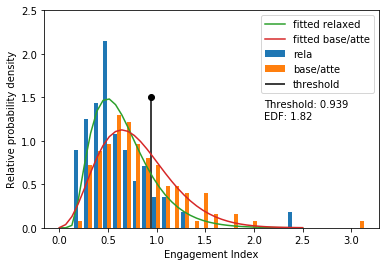

In [19]:
#plt.hist([rela.ravel(), atte.ravel()], bins=30,label=['relaxed','base/atte'], density=True)
idx_=4
plt.hist([np.hstack((rela[idx_,:])).ravel(), np.hstack((base[idx_,:],atte[idx_,:])).ravel()], 
         bins=30,label=['rela','base/atte'],density=True)
#plt.hist([rela.ravel(),np.hstack((base, atte)).ravel()], bins=30, label=['relaxed','base/atte'], density=True)

#x=np.linspace(0,0.2,40)
x=np.linspace(0,2.5,40)
plt.plot(x,beta.pdf(x,params1[0], params1[1], loc=params1[2], scale=params1[3]), label='fitted relaxed')
plt.plot(x,beta.pdf(x,params2[0], params2[1], loc=params2[2], scale=params2[3]), label='fitted base/atte')

#thres = np.percentile(np.hstack((base[idx_,:], atte[idx_,:])).ravel(),90)
thres = np.percentile(np.hstack((rela[idx_,:])).ravel(),90)
print('percentile_10 threshold: \t\t', thres)
tail_prob_rel = 1-beta.cdf(thres,params1[0], params1[1], loc=params1[2], scale=params1[3])
tail_prob_bas = 1-beta.cdf(thres,params2[0], params2[1], loc=params2[2], scale=params2[3])
print('remaining tail_prob relaxed: \t\t', tail_prob_rel)
print('remaining tail_prob base/at: \t\t', tail_prob_bas)
print('Engagement discrimination factor: \t', tail_prob_bas/tail_prob_rel)

plt.annotate('Threshold: {}\nEDF: {}'.format(np.round(thres,3), np.round(tail_prob_bas / tail_prob_rel,2)), 
             (2.1,1.25))

plt.vlines(thres,0,1.5,color='black', label='threshold')
plt.plot(thres,1.5,'o', color='black')
plt.ylim([0,2.5])
plt.xlabel('Engagement Index')
plt.ylabel('Relative probability density')
plt.legend()
#plt.title('Engagement indices during calibration trial - normalized')
plt.show()

In [20]:

pred_man_rela = np.zeros((len(rela[0,:]),1))
pred_man_rela[rela[4,:]> thres] = 1

pred_man_base = np.zeros((len(base[0,:]),1))
pred_man_base[base[4,:]> thres] = 1

pred_man_atte = np.zeros((len(atte[0,:]),1))
pred_man_atte[atte[4,:]> thres] = 1

pred_man = np.vstack((pred_man_rela, pred_man_base, pred_man_atte))


In [21]:
gt = np.zeros(((len(rela[0,:]) + len(base[0,:]) + len(atte[0,:])),1))
gt[len(rela[0,:])::] = 1

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(gt, pred_man)



array([[50,  6],
       [85, 39]], dtype=int64)

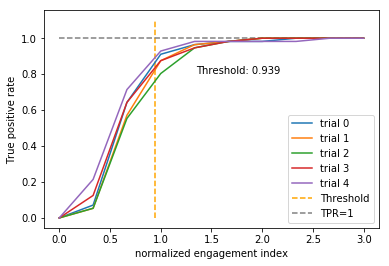

In [23]:
#thres_arr = np.linspace(0,0.15,10)
thres_arr = np.linspace(0,3,10)

tpr = []
fnr = []

for j in range(len(rela[:,0])):
    tpr_sub = []
    for i in range(len(thres_arr)):
        pred_man_rela = np.zeros((len(rela[j,:]),1))
        pred_man_rela[rela[j,:]> thres_arr[i]] = 1

        pred_man_base = np.zeros((len(base[j,:]),1))
        pred_man_base[base[j,:]> thres_arr[i]] = 1

        pred_man_atte = np.zeros((len(atte[j,:]),1))
        pred_man_atte[atte[j,:]> thres_arr[i]] = 1

        pred_man = np.vstack((pred_man_rela, pred_man_base, pred_man_atte))

        tp = confusion_matrix(gt, pred_man)[0,0]
        fp = confusion_matrix(gt, pred_man)[1,0]
        fn = confusion_matrix(gt, pred_man)[0,1]
        tn = confusion_matrix(gt, pred_man)[1,1]

        tpr_sub.append(tp/(tp+fn))
        #tpr.append(tp/(tp+fp)
    tpr.append(tpr_sub)
        #fnr.append(tn/(tn+fn))
        #fnr.append(fn/(tp+fn))
    plt.plot(thres_arr,tpr[j][:], label='trial {}'.format(j))

    
       
#plt.plot(thres_arr,tpr, label='tpr')
#plt.plot(thres_arr,fnr, label='fnr')

#plt.title('Comparison of TPRs across trials of one subject')
plt.xlabel('normalized engagement index')
plt.ylabel('True positive rate')
plt.vlines(thres, 0,1.1,linestyles='--', color='orange', label='Threshold')
plt.hlines(1,0,3, linestyles='--', color='gray', label='TPR=1')
plt.legend(loc=4)
plt.annotate('Threshold: {}'.format(np.round(thres,3)),(1.35,0.8), color='black')
plt.show()

#plt tpr vs fnr
#https://en.wikipedia.org/wiki/F1_score